### Part 2: Programming Problems

#### Problem 1 – Line Search
##### (1) Define the function $f(x)$

We consider the function
$$
f(x)= x_1^2+2x_2^2,
$$
where $x=(x_1,x_2)\in\mathbb{R}^2$.

In [7]:
import numpy as np

def f_line(x):
    # x is a numpy array: [x1, x2]
    x1, x2 = x[0], x[1]
    return x1**2 + 2*x2**2

##### (2) Define the gradient of $f(x)$

The gradient is
$$
\nabla f(x)= \begin{pmatrix} 2x_1 \\ 4x_2 \end{pmatrix}.
$$

In [8]:
def grad_f_line(x):
    x1, x2 = x[0], x[1]
    return np.array([2*x1, 4*x2])

##### (3) Evaluate $f(x)$ and $\nabla f(x)$ at $x^{(0)}=(9,1)^T$

In [9]:
x0_line = np.array([9, 1])
print("f(x0) =", f_line(x0_line))
print("grad f(x0) =", grad_f_line(x0_line))

f(x0) = 83
grad f(x0) = [18  4]


##### (4) Define the function $wolfe\_conditions$

This function verifies if the Wolfe conditions hold for a given step size $\alpha>0$. It takes:
- A function $f$
- Its gradient function $\nabla f$
- A current point $x$
- A descent direction $d$
- A step size $\alpha$
- Parameters $\eta$ and $\bar{\eta}$

and returns a tuple of booleans $(\text{first\_wolfe}, \text{second\_wolfe})$.

The Wolfe conditions are:
1. First Wolfe condition (sufficient decrease):
$$
f(x+\alpha d)\le f(x)+\alpha\eta\,\nabla f(x)^T d.
$$
2. Second Wolfe condition (curvature):
$$
\nabla f(x+\alpha d)^T d \ge \bar{\eta}\,\nabla f(x)^T d.
$$

In [10]:
def wolfe_conditions(f, grad_f, x, d, alpha, eta, eta_bar):
    cond1 = f(x + alpha * d) <= f(x) + alpha * eta * np.dot(grad_f(x), d)
    cond2 = np.dot(grad_f(x + alpha * d), d) >= eta_bar * np.dot(grad_f(x), d)
    return (cond1, cond2)


##### (5) Test the $wolfe\_conditions$ function

Test for $f(x)=x_1^2+2x_2^2$ at $x^{(0)}=(9,1)^T$ with 
$$
d^{(0)}=-\nabla f(x^{(0)}),
$$ 
$\alpha=0.05$, $\eta=0.01$, and $\bar{\eta}=0.8$.

In [11]:
d0_line = -grad_f_line(x0_line)
wolfe_test = wolfe_conditions(f_line, grad_f_line, x0_line, d0_line, 0.05, 0.01, 0.8)
print("Wolfe conditions (first, second):", wolfe_test)

Wolfe conditions (first, second): (True, False)


##### (6) Define the function $backtracking$

Implement the backtracking line search. It takes:
- A function $f$
- Its gradient $\nabla f$
- A current point $x$
- A descent direction $d$
- A maximum step size $\bar{\alpha}$
- Parameter $\eta$ (for the first Wolfe condition)

and returns the step size $\alpha^*$ and the new point $x_{\text{new}} = x+\alpha^* d$.  
The function should use the $wolfe\_conditions$ function.

In [14]:
def backtracking(f, grad_f, x, d, alpha_bar, eta, eta_bar=0.8, tau=0.5):
    alpha = alpha_bar
    while True:
        cond1, cond2 = wolfe_conditions(f, grad_f, x, d, alpha, eta, eta_bar)
        if cond1 and cond2:
            break
        alpha *= tau
        if alpha < 1e-8:
            break
    x_new = x + alpha * d
    return alpha, x_new

##### (7) Test the Backtracking Function

Test the backtracking function for $f(x)=x_1^2+2x_2^2$ at $x^{(0)}=(9,1)^T$ with 
$$
d^{(0)}=-\nabla f(x^{(0)}),
$$ 
$\bar{\alpha}=10$, and $\eta=0.01$.

In [16]:
alpha_star, x_new_line = backtracking(f_line, grad_f_line, x0_line, d0_line, alpha_bar=10, eta=0.01)
print("Test Backtracking: α* =", alpha_star)
print("Test Backtracking: x_new =", x_new_line)

Test Backtracking: α* = 0.625
Test Backtracking: x_new = [-2.25 -1.5 ]


#### Problem 2 – Unconstrained Optimisation
##### (1) Define the function

We consider:
$$
f(x)= x_1^3 - x_1 + x_2^3 - x_2.
$$

In [ ]:
def f_uncon(x):
    # x is a numpy array [x1, x2]
    x1, x2 = x[0], x[1]
    return x1**3 - x1 + x2**3 - x2

##### (2) Define the gradient of $f(x)$

For $x_1^3-x_1$, the derivative is $3x_1^2-1$.  
For $x_2^3-x_2$, the derivative is $3x_2^2-1$.  

Thus,
$$
\nabla f(x)= \begin{pmatrix} 3x_1^2-1 \\ 3x_2^2-1 \end{pmatrix}.
$$

In [ ]:
def grad_f_uncon(x):
    # Compute gradient components for f(x)=x1^3-x1+x2^3-x2
    x1, x2 = x[0], x[1]
    return np.array([3*x1**2 - 1, 3*x2**2 - 1])

##### (3) Fixed-step Gradient Descent

We implement gradient descent with the update rule:
$$
x^{(k+1)} = x^{(k)} - \alpha\,\nabla f(x^{(k)}),
$$
with a constant step size $\alpha$.  
We use the starting point $x^{(0)}=(1,1)^T$.

In [19]:
def fixed_gd(f, grad_f, x_start, alpha, max_iter=1000, tol=1e-6):
    # Initialize current point and store iterates
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for _ in range(max_iter):
        grad = grad_f(x_current)
        # Stop if the gradient norm is below tolerance
        if np.linalg.norm(grad) < tol:
            break
        # Update rule for gradient descent
        x_current = x_current - alpha * grad
        iterates.append(x_current.copy())
    return x_current, iterates

x0_uncon = np.array([1, 1])
alpha_fixed = 0.001  # Chosen fixed step size
x_fixed, iterates_fixed = fixed_gd(f_uncon, grad_f_uncon, x0_uncon, alpha_fixed)
print("Fixed-step GD final x:", x_fixed)
print("Fixed-step GD f(x):", f_uncon(x_fixed))

Fixed-step GD final x: [0.5870474 0.5870474]
Fixed-step GD f(x): -0.7694727904830598


##### (4) Gradient Descent with Backtracking

Implement gradient descent using backtracking line search.  
This method chooses $\alpha$ at each step so that the sufficient decrease condition holds.

In [20]:
def backtracking(f, grad_f, x, d, alpha_bar, eta, eta_bar=0.8, tau=0.5):
    # Initialize step size with the maximum allowed
    alpha = alpha_bar
    # Loop until the sufficient decrease condition is met
    while True:
        # Check first Wolfe condition: f(x+alpha*d) <= f(x) + alpha*eta*(grad f(x))^T*d
        if f(x + alpha * d) <= f(x) + alpha * eta * np.dot(grad_f(x), d):
            break
        alpha *= tau  # Reduce alpha by factor tau (e.g., 0.5)
        if alpha < 1e-8:
            break  # Avoid extremely small steps
    return alpha

def gd_backtracking(f, grad_f, x_start, alpha_bar=1, eta=0.01, tau=0.5, max_iter=1000, tol=1e-6):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    while True:
        grad = grad_f(x_current)
        if np.linalg.norm(grad) < tol:
            break
        d = -grad  # Descent direction is negative gradient
        # Use backtracking to choose step size
        alpha = backtracking(f, grad_f, x_current, d, alpha_bar, eta, tau=tau)
        # Update the current point
        x_current = x_current - alpha * grad
        iterates.append(x_current.copy())
        if len(iterates) >= max_iter:
            break
    return x_current, iterates

x_bt, iterates_bt = gd_backtracking(f_uncon, grad_f_uncon, x0_uncon, alpha_bar=1, eta=0.01)
print("Backtracking GD final x:", x_bt)
print("Backtracking GD f(x):", f_uncon(x_bt))

Backtracking GD final x: [0.57735046 0.57735046]
Backtracking GD f(x): -0.7698003589193778


##### (5) Newton’s Method with Backtracking

Implement Newton’s method with the update rule:
$$
x^{(k+1)} = x^{(k)} - [\nabla^2 f(x^{(k)})]^{-1}\nabla f(x^{(k)}),
$$
combined with backtracking line search.

For $f(x)=x_1^3-x_1+x_2^3-x_2$, the Hessian is given by:
$$
\nabla^2 f(x)= \begin{pmatrix} 6x_1 & 0 \\ 0 & 6x_2 \end{pmatrix}.
$$

In [21]:
def hessian_f_uncon(x):
    # Hessian for f(x)=x1^3-x1+x2^3-x2
    x1, x2 = x[0], x[1]
    return np.array([[6*x1, 0],
                     [0, 6*x2]])

def newton_backtracking(f, grad_f, hessian_f, x_start, alpha_bar=1, eta=0.01, tau=0.5, max_iter=100, tol=1e-6):
    x_current = np.array(x_start, dtype=float)
    iterates = [x_current.copy()]
    for _ in range(max_iter):
        grad = grad_f(x_current)
        if np.linalg.norm(grad) < tol:
            break
        H = hessian_f(x_current)
        # Compute the Newton direction using the Hessian inverse
        d = -np.linalg.solve(H, grad)
        # Use backtracking line search to choose the step size for Newton's method
        alpha = backtracking(f, grad_f, x_current, d, alpha_bar, eta, tau=tau)
        x_current = x_current + alpha * d
        iterates.append(x_current.copy())
    return x_current, iterates

x_newton_bt, iterates_newton_bt = newton_backtracking(f_uncon, grad_f_uncon, hessian_f_uncon, x0_uncon, alpha_bar=1, eta=0.01)
print("Newton with backtracking final x:", x_newton_bt)
print("Newton with backtracking f(x):", f_uncon(x_newton_bt))

Newton with backtracking final x: [0.57735027 0.57735027]
Newton with backtracking f(x): -0.769800358919501


##### (6) Final Results for Problem 2

We solved the problem using:
- Fixed-step Gradient Descent,
- Gradient Descent with Backtracking,
- Newton’s Method with Backtracking.

Review the final values of $x$ and $f(x)$.

In [22]:
print("Final results for Problem 2:")

# Fixed-step Gradient Descent
print("Fixed-step GD final x:", x_fixed, "with f(x) =", f_uncon(x_fixed))

# Gradient Descent with Backtracking
print("Backtracking GD final x:", x_bt, "with f(x) =", f_uncon(x_bt))

# Newton's Method with Backtracking
print("Newton with backtracking final x:", x_newton_bt, "with f(x) =", f_uncon(x_newton_bt))


Final results for Problem 2:
Fixed-step GD final x: [0.5870474 0.5870474] with f(x) = -0.7694727904830598
Backtracking GD final x: [0.57735046 0.57735046] with f(x) = -0.7698003589193778
Newton with backtracking final x: [0.57735027 0.57735027] with f(x) = -0.769800358919501


#### Problem 3 – Finite Difference
##### (1) Define the forward finite difference function

For a function $f$, the forward finite difference approximation for $f'(x)$ is:
$$
f'(x) \approx \frac{f(x+t)-f(x)}{t}.
$$
The function takes $f$, a point $x$, and a step $t$.

In [23]:
def forward_finite_difference(f, x, t):
    # Compute the finite difference quotient for the first derivative
    return (f(x + t) - f(x)) / t

##### (2) Define the function $f(x)=\sin(x)$ and its analytical derivative

We define:
$$
f(x)=\sin(x)
$$
and its derivative:
$$
f'(x)=\cos(x).
$$

In [24]:
import math

def f_sin(x):
    return math.sin(x)

def analytical_deriv_sin(x):
    return math.cos(x)

##### (3) Estimate $f'(1)$ Using Forward Finite Difference

For $f(x)=\sin(x)$ at $x=1$, compute the approximation for various $t$:
$$
t=10^{-16}, 10^{-15}, \dots, 10^{-2}, 10^{-1}.
$$
Then, compute the error compared to the true derivative $\cos(1)$, and plot error versus $t$ in log-log scale.

t = 1.0e-16, approx = 0.000000e+00, error = 5.403023e-01
t = 1.0e-15, approx = 5.551115e-01, error = 1.480921e-02
t = 1.0e-14, approx = 5.329071e-01, error = 7.395254e-03
t = 1.0e-13, approx = 5.395684e-01, error = 7.339159e-04
t = 1.0e-12, approx = 5.403455e-01, error = 4.324022e-05
t = 1.0e-11, approx = 5.403011e-01, error = 1.168704e-06
t = 1.0e-10, approx = 5.403022e-01, error = 5.848104e-08
t = 1.0e-09, approx = 5.403024e-01, error = 5.254127e-08
t = 1.0e-08, approx = 5.403023e-01, error = 1.407212e-08
t = 1.0e-07, approx = 5.403023e-01, error = 4.182769e-08
t = 1.0e-06, approx = 5.403019e-01, error = 4.207468e-07
t = 1.0e-05, approx = 5.402981e-01, error = 4.207362e-06
t = 1.0e-04, approx = 5.402602e-01, error = 4.207445e-05
t = 1.0e-03, approx = 5.398815e-01, error = 4.208255e-04
t = 1.0e-02, approx = 5.360860e-01, error = 4.216325e-03
t = 1.0e-01, approx = 4.973638e-01, error = 4.293855e-02


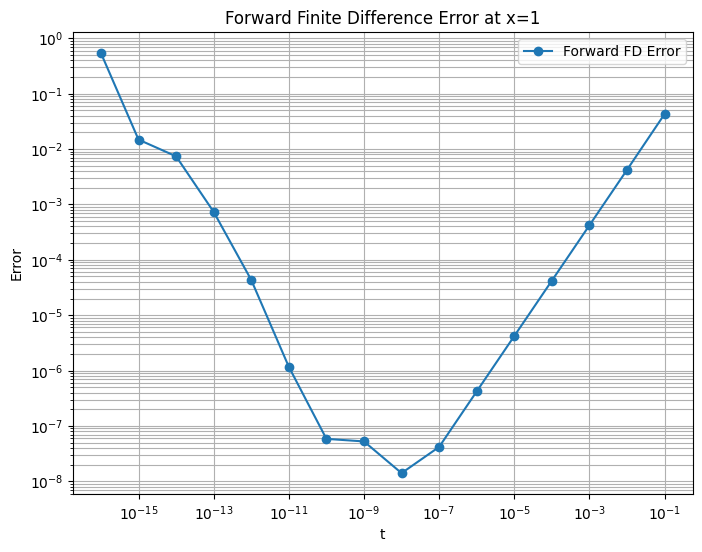

In [26]:
import matplotlib.pyplot as plt

t_values = np.logspace(-16, -1, num=16)
true_deriv = analytical_deriv_sin(1)
errors_forward = []

for t in t_values:
    approx = forward_finite_difference(f_sin, 1, t)
    error = abs(approx - true_deriv)
    errors_forward.append(error)
    print(f"t = {t:.1e}, approx = {approx:.6e}, error = {error:.6e}")

plt.figure(figsize=(8,6))
plt.loglog(t_values, errors_forward, 'o-', label='Forward FD Error')
plt.xlabel('t')
plt.ylabel('Error')
plt.title("Forward Finite Difference Error at x=1")
plt.legend()
plt.grid(True, which="both")
plt.show()